In [ ]:
# This script demonstrates MRI Fourier encoding (k-space)
# This script is incomplete. Your assignment is to complete it!
#
# Python version by dbe@stanford.edu (March 2025) for Rad229

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from skimage.transform import resize

# Define MRI system constants
def Rad229_MRI_sys_config():
    # Placeholder for MRI system config
    sys = {
        'gamma': 42.58e6,  # example gyromagnetic ratio (Hz/T)
        'G_max': 40e-3,    # example max gradient (T/m)
        'BW': 125e3,       # bandwidth in Hz
    }
    return sys

# sys = Rad229_MRI_sys_config()

# Load sample MRI data
mri_data = loadmat('MRI.mat')

# Extract the volume, then a slice of the image data, reduce the array dimensions to two
I = mri_data['D']
I = I[:, :, :, 10]
I = np.squeeze(I)

print(I.shape) # If you want to inspect the loaded data

(128, 128)


(np.float64(-0.5), np.float64(127.5), np.float64(127.5), np.float64(-0.5))

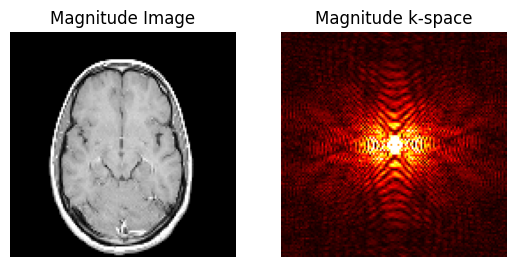

In [14]:
# Compute the 2D FFT
fft_array = np.fft.fft2(I)

# Shift the zero-frequency component to the center
fft_shifted = np.fft.fftshift(fft_array)

# Calculate the magnitude spectrum (for visualization)
kspc = np.abs(fft_shifted)

# Display original and reconstructed images
plt.figure
plt.subplot(1, 2, 1)
plt.title("Magnitude Image")
plt.imshow(I, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Magnitude k-space")
plt.imshow(kspc, cmap='hot')
plt.clim(0, 10000)
plt.axis('off')


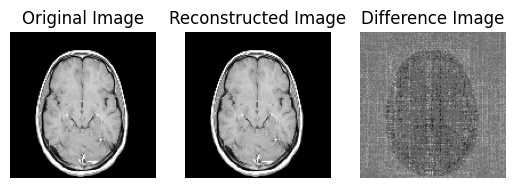

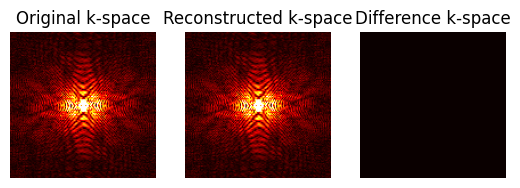

In [21]:
# Define the acquisition parameters matched to the object I
acq = {
    'FOVx': 0.3,  # Placeholder field of view (in meters)
    'FOVy': 0.3,
    'Nx': I.shape[1],
    'Ny': I.shape[0]
}

# Compute the Fourier sampling coefficients (k-space)
# Placeholder function to simulate MRI encoding
def Rad229_Fourier_Encoding(I, acq):
    # Simulate k-space as a 2D FFT of the image
    F = np.fft.fftshift(np.fft.fft2(I))
    return F

F = Rad229_Fourier_Encoding(I, acq)

# Compute inverse FFT of k-space to recover image
I_recon = np.abs(np.fft.ifft2(np.fft.ifftshift(F)))

# Display Original, Reconstructed, and Difference images
plt.figure

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(I, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Reconstructed Image")
plt.imshow(I_recon, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Difference Image")
plt.imshow(I_recon - I, cmap='gray')
plt.axis('off')

plt.show()

# Display Original, Reconstructed, and Difference k-space
plt.figure

plt.subplot(1, 3, 1)
plt.title("Original k-space")
plt.imshow(kspc, cmap='hot')
plt.clim(0, 10000)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Reconstructed k-space")
plt.imshow(np.abs(F), cmap='hot')
plt.clim(0, 10000)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Difference k-space")
plt.imshow(kspc - np.abs(F), cmap='hot')
plt.clim(0, 1)
plt.axis('off')

plt.show()

